# AIITP - Python Programming (Intake 3)

### Assignment (Due 3 June 2022 2359)

#### Instructions:

1) Do refer to the Assignment hand-out.
2) This the answer template that you can use, as reponse to the assignment. Rename it accordingly to the following naming convention - AY22_AII008_PP_YourName_StudentID.ipynb


***

Question 1:

In [2]:
# Write Python code for Question 1 here
#I-text
#P-Replace, Reverse
#O-Print,Replace, Reverse

text = input("Enter a text: ")
char_to_replace = {"a":"e", "e":"i", "i":"o", "o":"u", "u":"a"}
result = ''
for elem in text:
    if elem in char_to_replace:
        result += char_to_replace[elem]
    else:
        result += elem

# The original string is unchanged
print('Entered text: ', text)

print('Replaced text:', result)

rev_text = text[::-1]
print('Reverse text:', rev_text)



Entered text:  aeiou
Replaced text: eioua
Reverse text: uoiea


Question 2:

In [3]:
%pip install openpyxl

In [5]:
# Write Python code for Question 2 here

import openpyxl

workbook = openpyxl.load_workbook("COVID-19-Asia.xlsx")
sheet=workbook["covid"]

max_row = sheet.max_row
max_column = sheet.max_column

#create new worksheet
ws1 = workbook.create_sheet("Wigr") 

# add a column header for Wigr
ws1.cell(row=1, column=1).value = "location"
ws1.cell(row=1, column=2).value = "Weekly infection growth rate"

for i in range(2, max_row + 1):
    
    #read cell
    location = sheet.cell(row=i, column=2).value 
    last = sheet.cell(row=i, column=7).value        
    preceding = sheet.cell(row=i, column=8).value       
    if preceding>0:
        a = last/preceding
    else :
        a = last
    
    ws1.cell(row=i, column=1).value = location
    ws1.cell(row=i, column=2).value = a

    print("location:%s \tWeekly infection growth rate: %f" % (location, a))

    workbook.save("Wigr_1.xlsx")


location:DPRK 	Weekly infection growth rate: 1213550.000000
location:Taiwan 	Weekly infection growth rate: 1.754135
location:Japan 	Weekly infection growth rate: 1.384226
location:S. Korea 	Weekly infection growth rate: 0.855503
location:Thailand 	Weekly infection growth rate: 0.802144
location:Singapore 	Weekly infection growth rate: 1.291253
location:Malaysia 	Weekly infection growth rate: 1.817244
location:India 	Weekly infection growth rate: 0.785020
location:Vietnam 	Weekly infection growth rate: 0.774923
location:Israel 	Weekly infection growth rate: 1.014921
location:Turkey 	Weekly infection growth rate: 1.065074
location:Bahrain 	Weekly infection growth rate: 1.025302
location:Saudi Arabia 	Weekly infection growth rate: 2.225029
location:Iran 	Weekly infection growth rate: 0.971314
location:UAE 	Weekly infection growth rate: 1.598208
location:Indonesia 	Weekly infection growth rate: 1.538930
location:Hong Kong 	Weekly infection growth rate: 0.949136
location:China 	Weekly infec

Question 3a:

In [6]:
#retrieve data from SQL

import sqlite3
con = sqlite3.connect("database_wigr.db")
cursor = con.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

cursor.execute("SELECT * FROM locations")
names = list(map(lambda x: x[0], cursor.description))
print(names)

for row in cursor.execute('SELECT * FROM locations WHERE region ="Asia" ORDER BY wigr DESC LIMIT 20'):
        print(row)

[('sqlite_sequence',), ('locations',)]
['id', 'name', 'region', 'cases_per_million', 'wigr']
(1, 'DPRK', 'Asia', 46693, 1213550.0)
(112, 'Afghanistan', 'Asia', 7, 2.62)
(38, 'Saudi Arabia', 'Asia', 108, 2.23)
(121, 'Bangladesh', 'Asia', 1, 2.14)
(95, 'Pakistan', 'Asia', 2, 1.95)
(26, 'Malaysia', 'Asia', 563, 1.82)
(3, 'Taiwan', 'Asia', 18108, 1.75)
(78, 'Iraq', 'Asia', 20, 1.7)
(74, 'Qatar', 'Asia', 359, 1.67)
(54, 'UAE', 'Asia', 229, 1.6)
(60, 'Brunei', 'Asia', 4152, 1.55)
(55, 'Indonesia', 'Asia', 8, 1.54)
(6, 'Japan', 'Asia', 2175, 1.38)
(155, 'Kazakhstan', 'Asia', 3, 1.3)
(24, 'Singapore', 'Asia', 4180, 1.29)
(31, 'Turkey', 'Asia', 124, 1.07)
(36, 'Bahrain', 'Asia', 2482, 1.03)
(99, 'Lebanon', 'Asia', 74, 1.02)
(30, 'Israel', 'Asia', 1626, 1.01)
(71, 'Philippines', 'Asia', 10, 0.99)


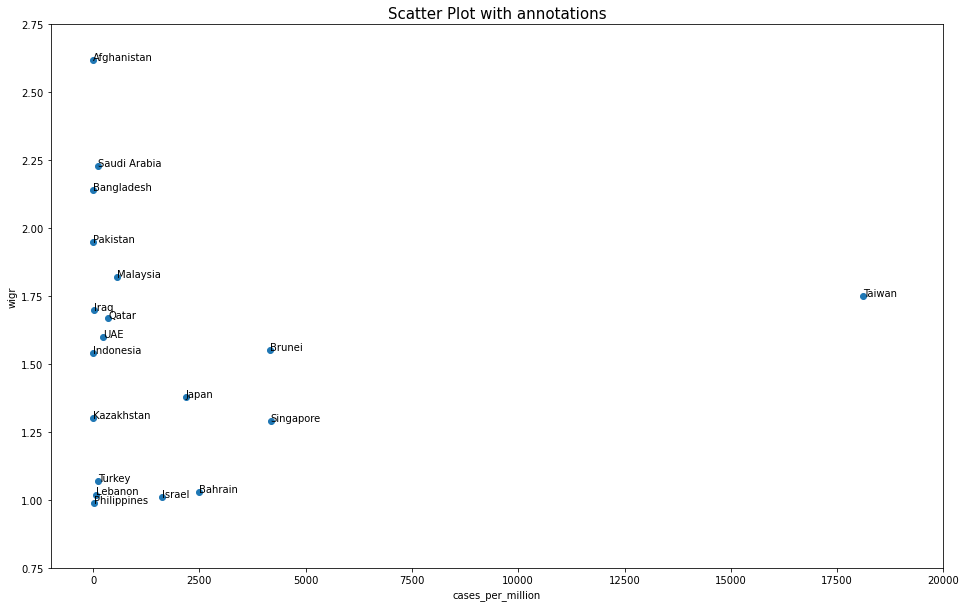

In [20]:
#create scatter plot

import matplotlib.pyplot as plt
import numpy as np

#def graph_data():
cursor.execute('SELECT * FROM locations WHERE region ="Asia" ORDER BY wigr DESC LIMIT 20')
data = cursor.fetchall()

cases_per_million = []
wigr = []
name = []
#annotations=name

for row in data:
    cases_per_million.append(row[3])
    wigr.append((row[4]))
    name.append((row[1]))

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(10)

plt.title("Scatter Plot with annotations",fontsize=15)

plt.scatter(cases_per_million,wigr)

for i, txt in enumerate(name):
    plt.annotate(txt, (cases_per_million[i], wigr[i]))

# Set axes
plt.ylim(0.75, 2.75)
plt.xlim(-1000, 20000)

# naming the x axis
plt.xlabel('cases_per_million')
# naming the y axis
plt.ylabel('wigr')

plt.savefig('scatter.png')
plt.show()

Question 3b:

In [21]:
# Write Python code for Question 3b here

#create table
#!pip install tabulate

from tabulate import tabulate

cursor.execute('SELECT * FROM locations WHERE region ="Asia" ORDER BY wigr DESC LIMIT 20')
data = cursor.fetchall()

cursor.execute("SELECT * FROM locations")
names = list(map(lambda x: x[0], cursor.description))
print(names)

print(tabulate(data, headers=names, tablefmt='fancy_grid'))




['id', 'name', 'region', 'cases_per_million', 'wigr']
╒══════╤══════════════╤══════════╤═════════════════════╤═════════════╕
│   id │ name         │ region   │   cases_per_million │        wigr │
╞══════╪══════════════╪══════════╪═════════════════════╪═════════════╡
│    1 │ DPRK         │ Asia     │               46693 │ 1.21355e+06 │
├──────┼──────────────┼──────────┼─────────────────────┼─────────────┤
│  112 │ Afghanistan  │ Asia     │                   7 │ 2.62        │
├──────┼──────────────┼──────────┼─────────────────────┼─────────────┤
│   38 │ Saudi Arabia │ Asia     │                 108 │ 2.23        │
├──────┼──────────────┼──────────┼─────────────────────┼─────────────┤
│  121 │ Bangladesh   │ Asia     │                   1 │ 2.14        │
├──────┼──────────────┼──────────┼─────────────────────┼─────────────┤
│   95 │ Pakistan     │ Asia     │                   2 │ 1.95        │
├──────┼──────────────┼──────────┼─────────────────────┼─────────────┤
│   26 │ Malaysia     │

In [22]:
import pandas as pd
import dataframe_image as dfi

cursor.execute('SELECT * FROM locations WHERE region ="Asia" ORDER BY wigr DESC LIMIT 20')
data = cursor.fetchall()

names = list(map(lambda x: x[0], cursor.description))

df=pd.DataFrame(data,columns=names)

dfi.export(df, "table3.png")



In [23]:
#create pdf


import fpdf

#create a new pdf
document = fpdf.FPDF()

#define font and color for title and add the first page
document.set_font("Times","B", 14)
document.set_text_color(19,83,173)
document.add_page()

#write the title of the document
document.cell(0,5,"WIGR")
document.ln()
#add a image
document.image("scatter.png", x=10, y=15, w=190)

document.add_page()
#add a table as image
document.image("table3.png", x=10, y=15, w=90)
document.set_y(140); 

#save the document
document.output("pdf_WIGR_Report.pdf")

''